## Introduction to the dataset

- World Health Organization has  estimated 12 million deaths occur worldwide, every year due to Heart diseases.

- Half the deaths in the United States and other developed countries are due to cardio vascular diseases. 

- The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

- This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.


In [163]:
import pandas as pd
import math
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, mean_squared_error
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
sc = StandardScaler()
le = LabelEncoder()

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
rfr = RandomForestRegressor()
rfc = RandomForestClassifier()
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Test
dfp = pd.read_csv('US_Heart_Patients.csv')
dfp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [132]:
target_var = 'TenYearCHD'

In [133]:
dfp.shape

(4240, 16)

###  EDA and Feature Engineering

#### Univariate Analysis

In [136]:
# Caonverting object and numerical to category

to_be_cat = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
dfp[to_be_cat]= dfp[to_be_cat].astype('category')
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             4240 non-null   category
 1   age              4240 non-null   int64   
 2   education        4135 non-null   category
 3   currentSmoker    4240 non-null   category
 4   cigsPerDay       4211 non-null   float64 
 5   BPMeds           4187 non-null   category
 6   prevalentStroke  4240 non-null   category
 7   prevalentHyp     4240 non-null   category
 8   diabetes         4240 non-null   category
 9   totChol          4190 non-null   float64 
 10  sysBP            4240 non-null   float64 
 11  diaBP            4240 non-null   float64 
 12  BMI              4221 non-null   float64 
 13  heartRate        4239 non-null   float64 
 14  glucose          3852 non-null   float64 
 15  TenYearCHD       4240 non-null   category
dtypes: category(8), float64(7), int64(1)
memor

In [137]:
not_to_plot = []

In [138]:
rand_color = ['red', 'blue', 'green']

In [139]:
dfp.TenYearCHD.replace(to_replace={1: 'Yes', 0:'No'}, inplace=True)
dfp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [140]:
def univariate(df, rows = 4, cols = 4):
    fig=plt.figure(figsize=(20,20))
    for j, i in enumerate(df.columns):
        ax=fig.add_subplot(rows,cols,j+1)
        if i in df.select_dtypes(['category']):
            sns.countplot(x= i, data = df, ax=ax)
        if i in df.select_dtypes(['int', 'float64']):
            sns.distplot(x = df[i], ax=ax, color=np.random.choice(rand_color))
    fig.tight_layout() 
    plt.show()

In [141]:
# univariate(dfp)

#### Bivariate Analysis

In [142]:
def bivariate(df, y = target_var, cols = 4, rows = 4):
    temp = not_to_plot[:]
    temp.append(y)
    fig=plt.figure(figsize=(25,20))

    for j, i in enumerate(df.columns):
        if df[y].dtype == 'float':
            if i in df.select_dtypes(['category']):
                if (i not in temp): 
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.boxplot(x = i, y = y, data = df)

            if i in df.select_dtypes(['float', 'int']):                
                if (i not in temp):      
                    ax=fig.add_subplot(rows,cols,j+1)       
                    sns.scatterplot(x = y, y = i, data = df)                  
            
        elif df[y].dtype == 'category':
            if i in df.select_dtypes(['category']):
                if (i not in temp):
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.countplot(x = i, hue = y, data = df)
                    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

            if i in df.select_dtypes(['float', 'int']):
                if (i not in temp):
                    ax=fig.add_subplot(rows,cols,j+1)
                    sns.boxplot(x = y, y = i, data = df)
    fig.tight_layout() 
    plt.show()

In [143]:
# bivariate(dfp)

#### Missing Values

In [144]:
dfp.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [145]:
# % of all missing var
miss_df = pd.DataFrame(dfp.isnull().sum(), columns=['Miss_Values'])
for i in miss_df.index:
    val = miss_df._get_value(i, miss_df.columns[0]) 
    if val > 0:
        print(i, "% : ", val*100/dfp.shape[0])

education % :  2.4764150943396226
cigsPerDay % :  0.6839622641509434
BPMeds % :  1.25
totChol % :  1.179245283018868
BMI % :  0.4481132075471698
heartRate % :  0.02358490566037736
glucose % :  9.150943396226415


In [152]:
# Case 1: Drop All Null Values.
dfp.dropna(inplace=True)
dfp.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [147]:
dfp.TenYearCHD = le.fit_transform(dfp.TenYearCHD)
dfp.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Treating Imbalanced Dataset

#### Model Building

##### 1. Logistic Regression

In [167]:
# Adding Constant variable
from statsmodels.tools import add_constant as ac
dfp_constant = ac(dfp)
dfp_constant.head()

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [185]:
col = dfp_constant.columns[:-1]
model = sm.Logit(dfp.TenYearCHD,dfp_constant[col])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.1175
Time:                        18:33:05   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
male                0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [236]:
# Accuracy Before Backward Elimination

x_train_i, x_test_i, y_train_i, y_test_i = split_data(dfp)

In [237]:
logreg=LogisticRegression()
logreg.fit(x_train_i,y_train_i)
y_pred_i=logreg.predict(x_test_i)

In [238]:
sklearn.metrics.accuracy_score(y_test_i,y_pred_i)

<IPython.core.display.Javascript object>

0.8469945355191257

In [188]:
# Back feature Elimination for variables whose p-value is more than 0.05

def back_feat_elem(df, colm = col, y = dfp[target_var]):
    while len(colm) > 0:
        model = sm.Logit(y, df[colm])
        result = model.fit(disp= 0)
        largest_pvalue = round(result.pvalues, 3).nlargest(1)
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            colm= colm.drop(largest_pvalue.index)

In [189]:
back_res = back_feat_elem(dfp_constant)
back_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3651
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Jul 2022   Pseudo R-squ.:                  0.1148
Time:                        18:50:24   Log-Likelihood:                -1381.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.408e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1353      0.475    -19.213      0.000     -10.067      -8.203
male           0.5617      0.107      5.258      0.000       0.352       0.771
age            0.0660      0.006     10.267      0.000       0.053       0.079
cigsPerDay     0.0192      0.004      4.606      0.000       0.011       0.027
totChol        0.0023      0.001      2.031      0.042    8.01e-05       0.004
sysBP          0.0175      0.002      8.155      0.000       0.013       0.022
glucose        0.0073      0.002      4.343      0.000       0.004       0.011
==============================================================================
"""

In [214]:
new_x = dfp_constant[back_res.params.index]
new_x.drop(columns=['const'], axis=1, inplace=True)
new_y = dfp_constant.TenYearCHD

,male,age,cigsPerDay,totChol,sysBP,glucose
0,1,39,0.0,195.0,106.0,77.0
1,0,46,0.0,250.0,121.0,76.0
2,1,48,20.0,245.0,127.5,70.0
3,0,61,30.0,225.0,150.0,103.0
4,0,46,23.0,285.0,130.0,85.0


In [232]:
new_df = pd.concat([new_x,new_y], axis=1)
x_train, x_test, y_train, y_test = split_data(new_df)

In [229]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [ ]:
def cm_data(cm):
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    print("Sensitivity: ", tp/(tp+fn))
    print("Specificity: ",tn/(tn+fp))
    print("Precision: ", tp/(tp+fp))

In [337]:
def check_accuracy(test, pred, conf_mat = 'no'):
    acc = accuracy_score(test, pred)
    if conf_mat == 'yes':
        cm = confusion_matrix(test, pred)
        cm_df = pd.DataFrame(cm, columns=['Pred: 0', 'Pred: 1'], index = ['Obs: 0', 'Obs: 1'])
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.show()
        cm_data(cm)
    return acc
    

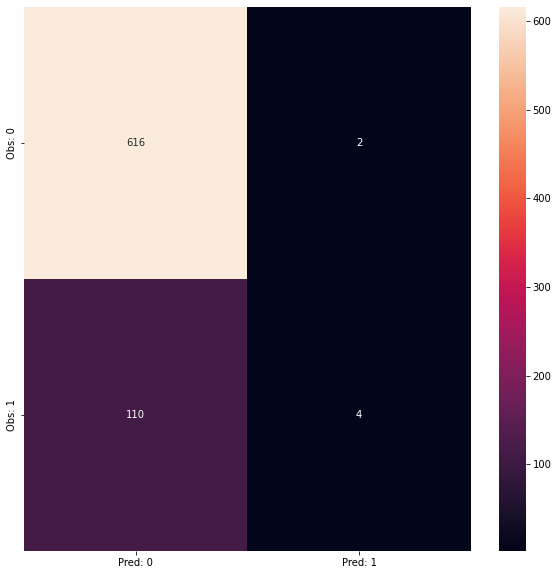

Sensitivity:  0.03508771929824561
Specificity:  0.9967637540453075
Precision:  0.6666666666666666
84.69945355191257


In [339]:
accuracy = check_accuracy(y_test, y_pred, conf_mat='yes')
print(accuracy*100)
# Accuracy is 84.9% now vs 84.6 earlier.
# Not much difference. 

Sensitivity is extremely Low, as the data is imbalanced.

Lowering the threshold from 0.5 to a lower value might increase Sensivity

In [286]:
# from sklearn.preprocessing import Binarizer
# for i in range(1,6):
#     y_pred_yes = logreg.predict_proba(x_test)
#     binarize = Binarizer(threshold=i/10)
#     y_pred2 = binarize.fit_transform(y_pred_yes)[:,1]

#     print(i/10)
#     cm_mat = confusion_matrix(y_test, y_pred2)
#     cm_data(cm_mat)

# 0.2 Threshlod looks good.

0.1
Sensitivity:  0.8157894736842105
Specificity:  0.35436893203883496
Precision:  0.18902439024390244
0.2
Sensitivity:  0.4473684210526316
Specificity:  0.7637540453074434
Precision:  0.25888324873096447
0.3
Sensitivity:  0.18421052631578946
Specificity:  0.9288025889967637
Precision:  0.3230769230769231
0.4
Sensitivity:  0.09649122807017543
Specificity:  0.9789644012944984
Precision:  0.4583333333333333
0.5
Sensitivity:  0.03508771929824561
Specificity:  0.9967637540453075
Precision:  0.6666666666666666


In [323]:
# Using Grid Search CV to find best parameters.

from sklearn.model_selection import GridSearchCV, cross_val_score

params = {
    'penalty': ['l1', 'l2','elasticnet'],
    'tol': [0.1, 0.01],
    'C': [0.1, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 100],
    'multi_class': ['auto', 'ovr','multinomial'],
    'n_jobs': [3,4],
}

grid_log_reg = GridSearchCV(LogisticRegression(), params, cv=5, n_jobs=3)
grid_log_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.1, 0.01], 'max_iter': [10, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'n_jobs': [3, 4],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.1, 0.01]})

In [328]:
best_par = grid_log_reg.best_params_
best_par

{'C': 0.1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 3,
 'penalty': 'l2',
 'solver': 'newton-cg',
 'tol': 0.1}

In [326]:
best_log_reg_score = cross_val_score(best_par, x_train, y_train, cv = 5)
print(best_log_reg_score.mean()*100)

85.27003296286573


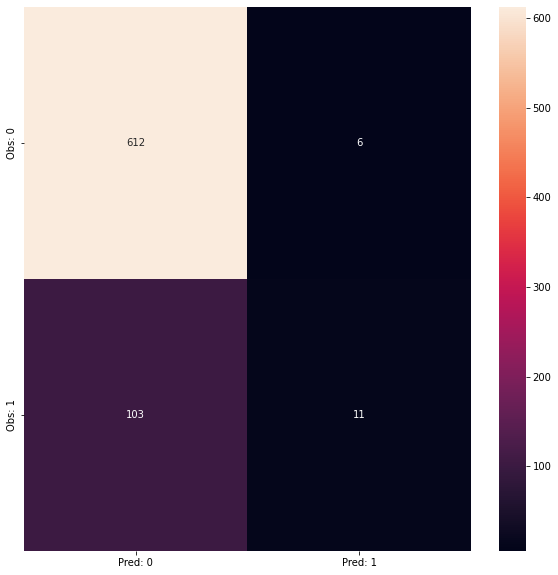

Sensitivity:  0.09649122807017543
Specificity:  0.9902912621359223
Precision:  0.6470588235294118


0.8510928961748634

In [346]:
y_pred_grid_proba = grid_log_reg.predict_proba(x_test)
binarize = Binarizer(threshold=0.5)
y_pred_grid = binarize.fit_transform(y_pred_grid_proba)[:,1]
check_accuracy(y_test, y_pred_grid, conf_mat = 'yes')

# Accuracy has risen a little bit, but the data still needs to be balanced.

##### 5: Random Forest Classifier

In [ ]:
# def RFmodel(df, tar = target_var, submission = 'No', want_acc = 'No', feat_imp = 'No'):

#     pred_null, accuracy = 0, 0

#     x_train, x_test, x_val, y_train, y_val, y_test = split_data(df)
#     X_train = x_train[:]

#     x_train = sc.fit_transform(x_train)
#     x_test = sc.transform(x_test)

#     if df[tar].dtype in ['float', 'int']:
#         model = rfr.fit(x_train, y_train)
#         if feat_imp == 'yes':
#             features = rfr.feature_importances_
#             sorted_indices = np.argsort(features)[::-1]
#             plt.title('Feature Importance')
#             plt.bar(range(X_train.shape[1]), features[sorted_indices], align='center')
#             plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
#             plt.tight_layout()
#             plt.show()

#     elif df[tar].dtype == 'category':
#         model = rfc.fit(x_train, y_train)
#         if feat_imp == 'yes':
#             features = rfc.feature_importances_
#             sorted_indices = np.argsort(features)[::-1]
#             plt.title('Feature Importance')
#             plt.bar(range(X_train.shape[1]), features[sorted_indices], align='center')
#             plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
#             plt.tight_layout()
#             plt.show()
#     else:
#         print("No Model")

#     if want_acc == 'yes':
#         accuracy = get_acc(model, x_val, y_val, df[tar].dtype)

#     pred_null = model.predict(x_test)

#     return pred_null, accuracy

In [227]:
def split_data(df, y = target_var):
    x = df.loc[:, df.columns != y]
    y = df.loc[:, y]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)
    # x_train, x_val, y_train, y_val =  train_test_split(x_train, y_train, test_size = 0.2, random_state = 123)

    return x_train, x_test, y_train, y_test

In [193]:
def get_acc(model, x, y, type_of_y):
    pred_acc = model.predict(x)
    if type_of_y in ['float', 'int']:
        return math.sqrt(mean_squared_error(pred_acc, y))
    elif type_of_y == 'category':
        return accuracy_score(y, pred_acc)
    else:
        print("No Accuracy")